In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None,'display.max_columns',None)
pd.set_option("precision", 2)

In [4]:
#df = pd.read_csv('Output/filtered_dataset.csv')

In [5]:
# filter Fire department data and only
# fire_df = df[(df['Department Title']=='Fire (LAFD)') &
#             (df['Employment Type']=='Full Time')].copy(deep=True)
# fire_df.to_csv('Output/Fire_Department_Full_Time_Data.csv')

/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


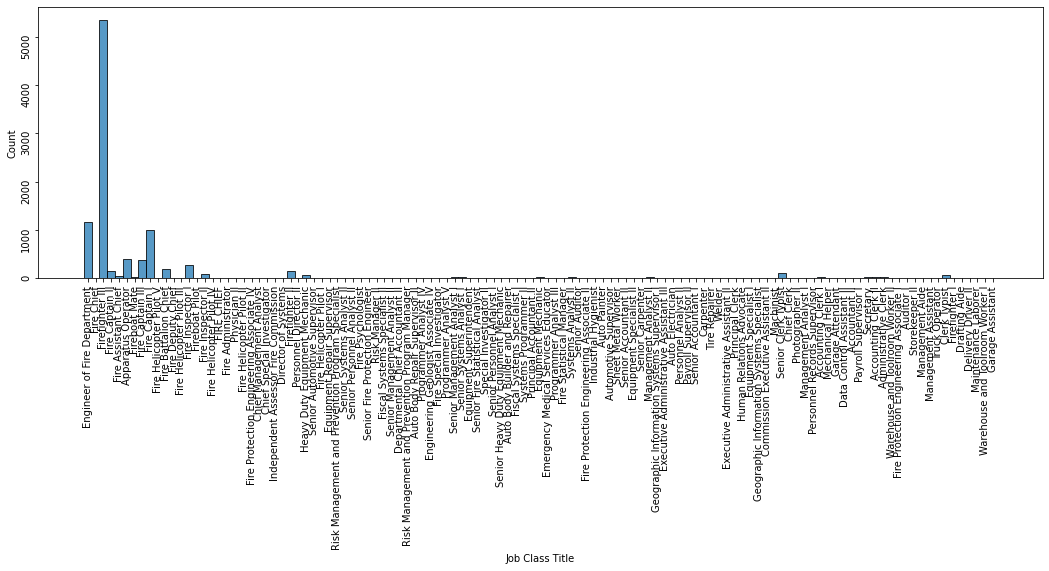

In [6]:
fire_df = pd.read_csv('Output/Fire_Department_Full_Time_Data.csv')
fire_df = fire_df[fire_df['Base Pay']> 0]
fire_df =fire_df[(fire_df['Q1 Payments']> 0) &
       (fire_df['Q2 Payments']> 0) &
       (fire_df['Q3 Payments']> 0) &
       (fire_df['Q4 Payments']> 0)]

fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=fire_df, x='Job Class Title')
ax.tick_params(rotation=90)



In [7]:
# job titles with greater than 100 records
temp = fire_df['Job Class Title'].value_counts()
job_titles = temp[temp>100].index
job_titles

Index(['Firefighter III', 'Engineer of Fire Department', 'Fire Captain I',
       'Apparatus Operator', 'Fire Captain III', 'Fire Inspector I',
       'Fire Battalion Chief', 'Fire Captain II', 'Firefighter II',
       'Senior Clerk Typist'],
      dtype='object')

,Unnamed: 0,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,1,123059,2015,Fire (LAFD),3001.0,1079101020,Engineer of Fire Department,Full Time,38.17,79690.76,69744.50,90006.71,74420.10,65353.98,196893.29,191.84,299525.29,102632.00,7410.00,0.00,1088.0,0.00,187999.29,396.00,8894.00,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2131,0,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2131.pdf
2,4,65133,2014,Fire (LAFD),3001.0,3828116389,Firefighter III,Full Time,38.01,79355.19,45714.77,51080.40,54483.22,147914.96,213146.84,247.71,299193.35,86046.51,16901.74,7035.83,884.0,0.00,101380.45,86944.82,111766.39,23.0,FIREFIGHTERS & FIRE CAPT,38,2112,3,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2112.pdf
3,6,123060,2015,Fire (LAFD),3001.0,832044637,Fire Captain II,Full Time,65.42,136586.52,56016.96,68233.34,104385.66,70463.59,171681.95,134.74,299099.55,127417.60,7279.20,0.00,1088.0,3301.46,160013.29,0.00,11668.66,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2142,2,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
5,8,65134,2014,Fire (LAFD),3001.0,4055219444,Apparatus Operator,Full Time,37.47,78229.16,67026.04,69849.95,78405.06,83432.29,197426.59,194.92,298713.34,101286.75,7408.51,0.00,884.0,2648.19,185957.89,528.00,11468.70,23.0,FIREFIGHTERS & FIRE CAPT,38,2121,0,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2121.pdf
7,11,123062,2015,Fire (LAFD),3001.0,4083098975,Firefighter III,Full Time,37.81,78945.04,61840.48,70370.48,91024.06,74392.59,210469.21,241.48,297627.61,87158.40,21810.00,0.00,1088.0,0.00,187439.21,132.00,23030.00,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf


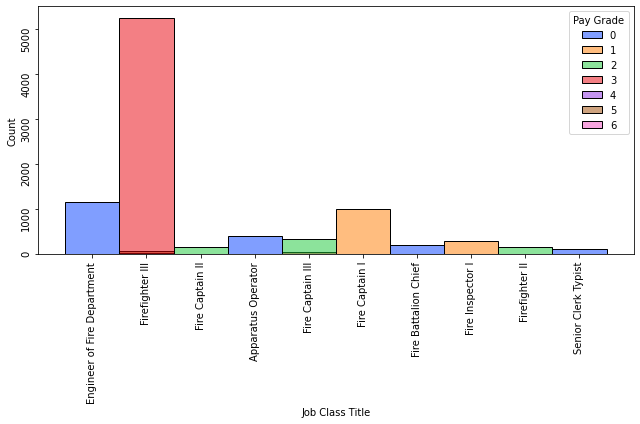

In [8]:
#filtering fire_df for interested job titles

df_final = fire_df[fire_df['Job Class Title'].isin(job_titles)].copy(deep=True)
df_final['Pay Grade'] = df_final['Pay Grade'].astype(int)

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(data=df_final, x='Job Class Title',hue='Pay Grade',palette ='bright')
ax.tick_params(rotation=90)
plt.tight_layout()
plt.savefig('Output/fire_filter_records100_barchart.png')

df_final.head()

In [9]:
df_final['Pay Grade'].value_counts()

3    5306
0    1863
1    1290
2     623
5      75
6      15
4      15
Name: Pay Grade, dtype: int64

In [10]:
df_final[df_final['Pay Grade']==0]['Job Class Title'].unique()

array(['Engineer of Fire Department', 'Apparatus Operator',
       'Fire Battalion Chief', 'Senior Clerk Typist'], dtype=object)

In [11]:
df_final[df_final['Pay Grade']==1]['Job Class Title'].unique()

array(['Fire Captain I', 'Fire Inspector I'], dtype=object)

In [12]:
df_final[df_final['Pay Grade']==2]['Job Class Title'].unique()

array(['Fire Captain II', 'Fire Captain III', 'Firefighter II'],
      dtype=object)

In [13]:
df_final[df_final['Pay Grade']==3]['Job Class Title'].unique()

array(['Firefighter III', 'Fire Captain III'], dtype=object)

In [14]:
df_final[df_final['Pay Grade']==4]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

In [15]:
df_final[df_final['Pay Grade']==5]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

In [16]:
df_final[df_final['Pay Grade']==6]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

<AxesSubplot:xlabel='% Over Base Pay', ylabel='Count'>

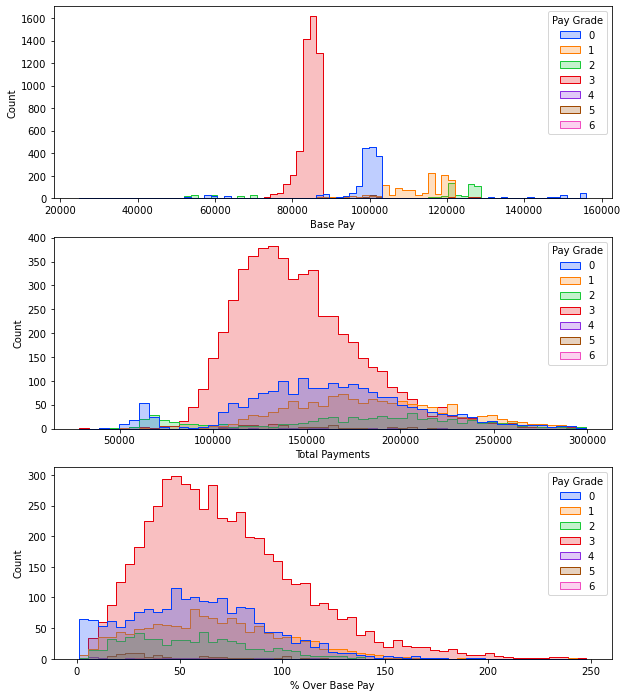

In [17]:
fig, ax = plt.subplots(3, figsize = (10,12))
sns.histplot(data=df_final, x = 'Base Pay', hue='Pay Grade',palette ='bright',element='step',ax = ax[0])
sns.histplot(data=df_final, x = 'Total Payments', hue='Pay Grade',palette ='bright', ax = ax[1],element='step')
sns.histplot(data=df_final, x = '% Over Base Pay', hue='Pay Grade',palette ='bright', ax = ax[2],element='step')

# Base Pay is showing clear bins of data but total payment is not which is indicative of overtime/other payments

(-1.0, 10.0)

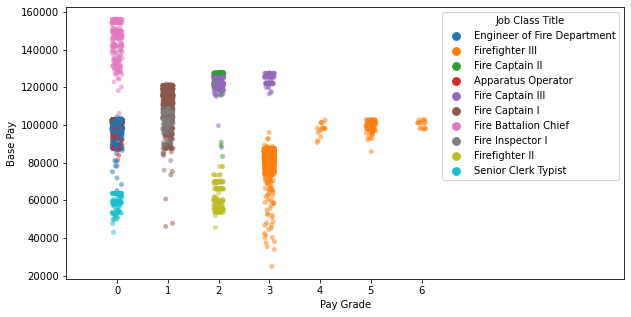

In [18]:
fig,ax = plt.subplots(figsize =(10,5))
sns.stripplot(data=df_final,x='Pay Grade',y='Base Pay',hue='Job Class Title',alpha = 0.5)
plt.xlim(-1,10)

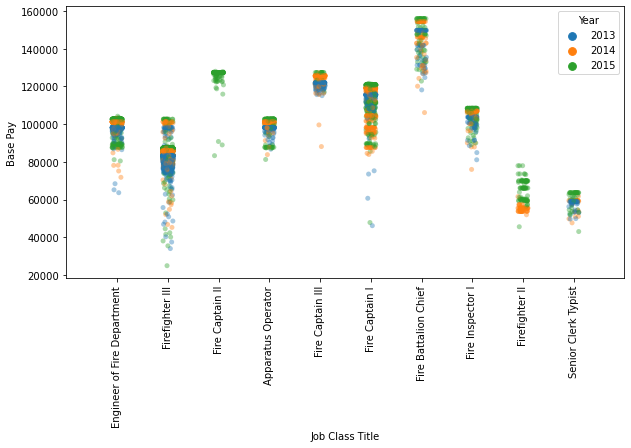

In [19]:
fig,ax = plt.subplots(figsize =(10,5))
sns.stripplot(data=df_final,x='Job Class Title',y='Base Pay',hue='Year',alpha = 0.4)
# sns.boxplot(data=df_final,x='Job Class Title',y='Base Pay')
plt.xlim(-1,10)
ax.tick_params(axis ='x',rotation=90)

In [33]:
group_data = df_final.groupby(['Pay Grade','Job Class Title','Year'])

In [42]:
summary = group_data['Base Pay','Total Payments'].mean()
# summary.pivot(columns='Year')
summary.unstack(level=-1)
# summary

<ipython-input-42-7fe23db64f91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = group_data['Base Pay','Total Payments'].mean()


Base Pay                        \
Year                                        2013       2014       2015   
Pay Grade Job Class Title                                                
0         Apparatus Operator            97520.40  100454.44   99934.94   
          Engineer of Fire Department   97518.28  100470.08  100204.14   
          Fire Battalion Chief         142838.54  144837.58  146564.57   
          Senior Clerk Typist           57148.77   57533.87   60703.92   
1         Fire Captain I               114026.65  112696.93  113601.00   
          Fire Inspector I             101833.29  104848.58  105190.31   
2         Fire Captain II                    NaN        NaN  125873.06   
          Fire Captain III             121133.97  124474.62        NaN   
          Firefighter II                     NaN   55090.04   65581.26   
3         Fire Captain III             121548.21  124871.74  126367.47   
          Firefighter III               81963.96   85054.54   86115.35   
4         Firefighter III               97378.12   99936.12   95207.49   
5         Firefighter III               96522.25  100020.34  101250.51   
6         Firefighter III               98089.76  101039.80  102297.95   

                                      Total Payments                        
Year                                            2013       2014       2015  
Pay Grade Job Class Title                                                   
0         Apparatus Operator               146433.34  163276.94  177492.10  
          Engineer of Fire Department      149001.67  165209.38  172662.73  
          Fire Battalion Chief             218766.07  225188.00  231332.57  
          Senior Clerk Typist               60021.16   63563.39   64065.66  
1         Fire Captain I                   193036.33  189746.52  195016.25  
          Fire Inspector I                 151820.83  163307.16  169495.09  
2         Fire Captain II                        NaN        NaN  213671.40  
          Fire Captain III                 188492.07  203816.03        NaN  
          Firefighter II                         NaN   67329.99   94872.86  
3         Fire Captain III                 180510.08  190112.14  187372.32  
          Firefighter III                  135648.90  146475.17  156216.91  
4         Firefighter III                  132387.87  144630.63  141281.01  
5         Firefighter III                  138716.52  145627.68  157577.66  
6         Firefighter III                  147912.43  155498.68  161706.16

In [123]:
df_final['Year'].unique()

array([2015, 2014, 2013])

<AxesSubplot:xlabel='Pay Grade', ylabel='Base Pay'>

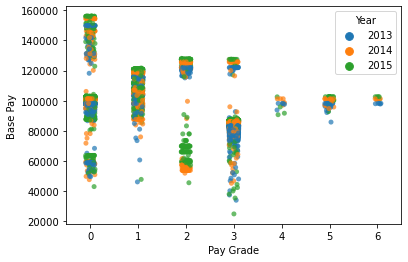

In [127]:
sns.stripplot(data=df_final,x='Pay Grade',y='Base Pay',hue='Year',alpha = 0.7)